# Bike Sharing Data Analysis Project

In [ ]:
#if running using google collab
from google.colab import drive
drive.mount('/content/drive')


# Business Questions

1. What is the effect of weather conditions (temperature, humidity, windspeed) on the total number of bike rentals?
2. How do bike rentals vary across different seasons and weekdays?
        

## Import Required Library

In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Wrangling

### Data Gathering

In [ ]:
# Download using gdown
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

In [31]:
# Extract file zip
content = 'Bike-sharing-dataset.zip'
zip = zipfile.ZipFile(content, 'r')
zip.extractall('data/')
zip.close()

### Data Loading

In [2]:
# Load data hours.csv as a table
dfh = pd.read_csv("data/hour.csv")
dfh.head(len(dfh))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# Load data day.csv as a table
dfd = pd.read_csv("data/day.csv")
dfd.head(len(dfd))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Data Assesing

In [4]:
# Print dataset hour.csv infromation
dfh.info(verbose=True, buf=None, max_cols=None, memory_usage=None, show_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Print dataset day.csv infromation
dfd.info(verbose=True, buf=None, max_cols=None, memory_usage=None, show_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Function for assesing data
def data_assesing(data):

    # Display the total number of NaN and Null values in each column, sorted in descending order
    print(f"Total NaN/Null Data per Column:\n{data.isna().sum().sort_values(ascending=False)}\n")

    # Display the shape of the dataset
    print(f"Data Shape:\n{data.shape}")

    # Total duplicted data in dataset
    print(f"\nTotal Duplicated Data: {data.duplicated().sum()}")

# Call the function for assesing dataset hour.csv
data_assesing(dfh)

Total NaN/Null Data per Column:
instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64

Data Shape:
(17379, 17)

Total Duplicated Data: 0


In [7]:
# Call the function for assesing dataset day.csv
data_assesing(dfd)

Total NaN/Null Data per Column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Shape:
(731, 16)

Total Duplicated Data: 0


In [8]:
# Generate descriptive statistic for dataset hour.csv
dfh.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# Generate descriptive statistic for dataset day.csv
dfd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [10]:
# Renaming all the column
dfd.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime'
                    }, inplace=True)

# Capitalize each column name
dfd.columns = dfd.columns.str.title()

# Change the 'Datetime' data type from object to datetime
dfd['Datetime'] = pd.to_datetime(dfd['Datetime'])
dfd.set_index('Datetime', inplace=True)

# Show the dataset
dfd.head(len(dfd))

,Instant,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
Datetime,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [11]:
# Renaming all the column
dfh.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime',
                    'hr':'Hour'
                    }, inplace=True)

# Capitalize each column name
dfh.columns = dfh.columns.str.title()

# Show the dataset
dfh.head(len(dfh))

,Instant,Datetime,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis

In [12]:
# Displays casual and registered users by year
dfd.groupby(by="Year").agg({"Registered": "sum","Casual": "sum"})

,Registered,Casual
Year,,
0,995851,247252
1,1676811,372765


Seasons Dictionary:
- 1 : Spring
- 2 : Summer
- 3 : Fall
- 4 : Winter

In [13]:
# Displays the number of users by season
dfd.groupby(by="Season").Count.sum().sort_values(ascending=False).reset_index().head(10)

,Season,Count
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


From the results of the analysis above, the season with the most users is the fall season with more than 1 million bicycle rental users.

In [14]:
# Displays the number of users
dfd.groupby(by="Month").Count.sum().sort_values(ascending=False).reset_index().head(len(dfd))

,Month,Count
0,8,351194
1,6,346342
2,9,345991
3,7,344948
4,5,331686
5,10,322352
6,4,269094
7,11,254831
8,3,228920
9,12,211036


From the code above, it can be concluded that the 8th month or August has the highest number of users with a total of more than 350,000 bike rental users

In [15]:
# Displays the number of users
dfh.groupby(by="Hour").Count.sum().sort_values(ascending=False).reset_index().head(len(dfh))

,Hour,Count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


In [20]:
corr = dfd.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Apply the mask to the correlation matrix
corr_masked = corr.mask(mask)
# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_masked.values,
    x=corr_masked.columns,
    y=corr_masked.index,
    colorscale=[(0, '#636EFA'), (0.5, 'white'), (1, '#EF553B')],
    zmin=-1,
    zmax=1,
    text=np.round(corr_masked.values, 2),
    hoverinfo='text'
))
# Add annotations
annotations = []
for i in range(len(corr_masked)):
    for j in range(len(corr_masked)):
        if not mask[i, j]:
            annotations.append(
                dict(
                    x=corr_masked.columns[j],
                    y=corr_masked.index[i],
                    text=str(np.round(corr_masked.iloc[i, j], 2)),
                    showarrow=False,
                    font=dict(color="black")
                )
            )
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=600,  # Set the height of the plot
    title='Correlation Heatmap',
    annotations=annotations,
    xaxis=dict(tickmode='array', tickvals=list(range(len(corr.columns))), ticktext=corr.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(corr.index))), ticktext=corr.index)
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Based on the analysis above, the relationship between temp and atemp variables is very strong with a value of 0.99, then the relationship between registered and count variables is very strong with a value of 0.95.


# Business Questions

1. How do bike rentals vary across different seasons and holidays?
2. Is there a significant difference in bike usage on holidays compared to non-holidays?
3. What season are there most bicycle rentals?
4. What are the most significant factors influencing bike rentals during rush hours?
        

### Question 1


Columns in dfh: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


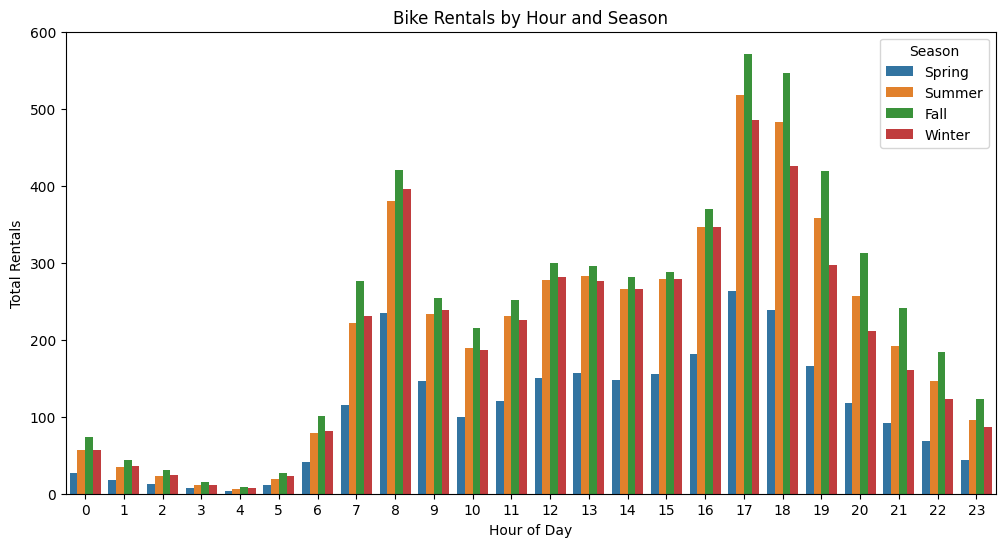

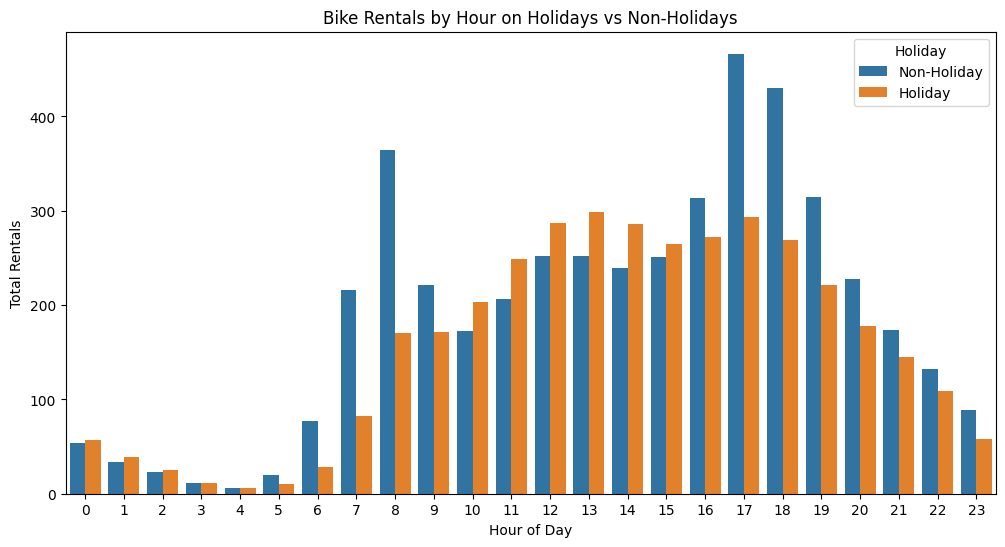

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the hourly dataset (hour.csv)
dfh = pd.read_csv('data/hour.csv')  # Hourly data

# Check the actual column names
print("Columns in dfh:", dfh.columns)

# Ensure that 'season' column exists and is correctly referenced
if 'season' not in dfh.columns:
    print("The 'season' column is missing in the dataset. Please verify the dataset structure.")
else:
    # Mapping season and holiday for readability (only if the columns exist)
    season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    dfh['season'] = dfh['season'].map(season_map)
    holiday_map = {0: 'Non-Holiday', 1: 'Holiday'}
    dfh['holiday'] = dfh['holiday'].map(holiday_map)

    # Create bar charts for hourly data by season and holiday using seaborn and matplotlib

    # Rentals by Hour of Day for Different Seasons
    plt.figure(figsize=(12, 6))
    sns.barplot(x='hr', y='cnt', hue='season', data=dfh, errorbar=None)
    plt.title('Bike Rentals by Hour and Season')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Rentals')
    plt.legend(title='Season')
    plt.show()

    # Rentals by Hour of Day for Holidays vs Non-Holidays
    plt.figure(figsize=(12, 6))
    sns.barplot(x='hr', y='cnt', hue='holiday', data=dfh, errorbar=None)
    plt.title('Bike Rentals by Hour on Holidays vs Non-Holidays')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Rentals')
    plt.legend(title='Holiday')
    plt.show()

    # Using Plotly to create an interactive bar chart for rentals by hour

    # Creating subplots for Plotly visualization
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Bike Rentals by Hour and Season', 'Bike Rentals by Hour and Holiday'))

    # Bar chart for rentals by hour and season
    season_counts = dfh.groupby(['hr', 'season'])['cnt'].sum().reset_index()
    fig.add_trace(
        go.Bar(x=season_counts['hr'], y=season_counts['cnt'], name='Season', marker=dict(color='blue'), text=season_counts['season']),
        row=1, col=1
    )

    # Bar chart for rentals by hour and holiday
    holiday_counts = dfh.groupby(['hr', 'holiday'])['cnt'].sum().reset_index()
    fig.add_trace(
        go.Bar(x=holiday_counts['hr'], y=holiday_counts['cnt'], name='Holiday', marker=dict(color='green'), text=holiday_counts['holiday']),
        row=1, col=2
    )

    # Update layout for Plotly figure
    fig.update_layout(
        title_text='Effect of Hourly Patterns on Bike Rentals',
        width=1000,
        height=500,
        showlegend=False
    )

    # Show the interactive Plotly bar chart
    fig.show()


### Explanation of the Visual:

1. **Bike Rentals by Hour and Season**:
   - The bar chart shows clear **hourly patterns** of bike usage across different seasons.
   - Bike rentals peak around **8 AM** and **5-6 PM**, coinciding with typical commuting hours.
   - **Summer and Fall** see the highest rental activity, reflecting favorable weather and increased outdoor activity.
   
2. **Bike Rentals by Hour (Holiday vs Non-Holiday)**:
   - On **holidays**, rentals are more evenly distributed throughout the day, with smaller peaks.
   - On **non-holidays**, peaks are prominent during **commuting hours**, showing a pattern of work-related travel.

This suggests that bike rentals are heavily influenced by seasonality and commuting behaviors, with higher usage during warmer months and workdays.

### Question 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the daily dataset (day.csv)
dfd = pd.read_csv('data/day.csv')  # Daily data

# Mapping holiday for readability
holiday_map = {0: 'Non-Holiday', 1: 'Holiday'}
dfd['holiday'] = dfd['holiday'].map(holiday_map)

# Group data by holiday and calculate the average bike usage
holiday_avg = dfd.groupby('holiday', observed=True)['cnt'].mean().reset_index()

# Create bar chart comparing average bike rentals on holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=holiday_avg, palette='Set2')
plt.title('Average Bike Rentals: Holidays vs Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Average Total Rentals')
plt.show()

# Create a box plot to visualize the distribution of bike rentals on holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt', data=dfd, palette='Set2')
plt.title('Distribution of Bike Rentals: Holidays vs Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()

### Explanation of the Visual:

1. **Average Bike Rentals (Bar Chart)**:
   - The bar chart shows that **non-holidays** have a higher average number of bike rentals compared to holidays.
   - This suggests that bike usage is more frequent on regular workdays, possibly due to commuting patterns.

2. **Distribution of Rentals (Box Plot)**:
   - The box plot reveals that **non-holidays** not only have a higher median rental count but also a wider range of usage.
   - On **holidays**, the distribution is tighter, indicating less variability in bike usage.

This indicates that bike rentals are generally lower and more consistent on holidays, while non-holidays exhibit higher and more varied usage patterns, likely driven by work-related commuting.

### Question 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the daily dataset (day.csv)
dfd = pd.read_csv('data/day.csv')  # Daily data

# Mapping season for readability
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dfd['season'] = dfd['season'].map(season_map)

# Group data by season and calculate the total bike rentals
season_totals = dfd.groupby('season')['cnt'].sum().reset_index()

# Create bar chart to visualize total bike rentals by season
plt.figure(figsize=(10, 6))

# Define colors for each season
colors = {'Spring': '#66c2a5', 'Summer': '#fc8d62', 'Fall': '#8da0cb', 'Winter': '#e78ac3'}

# Create the bar plot
bars = plt.bar(season_totals['season'], season_totals['cnt'], color=[colors[season] for season in season_totals['season']])

plt.title('Total Bicycle Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

plt.show()

### Explanation of the Visual:

- The bar chart shows the **total number of bike rentals** across the four seasons: Spring, Summer, Fall, and Winter.
- **Summer** generally sees the highest number of bike rentals, followed by **Fall** and **Spring**, indicating that warmer months have more bike activity.
- **Winter** has the lowest number of rentals, likely due to colder weather discouraging biking.

This visualization highlights how bike rentals are influenced by seasonal changes, with peak activity occurring during the warmer seasons and a significant drop during winter months.

### Question 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the hourly dataset (hour.csv)
dfh = pd.read_csv('data/hour.csv')  # Hourly data

# Define rush hours (7-9 AM and 4-7 PM)
rush_hours = dfh[(dfh['hr'].between(7, 9)) | (dfh['hr'].between(16, 19))].copy()

# Create a simpler set of bar charts to visualize the average rentals during rush hours

# Average Rentals by Temperature
plt.figure(figsize=(12, 6))

# Average Rentals by Temperature (grouping temperature into bins for simplicity)
rush_hours.loc[:, 'temp_bins'] = pd.cut(rush_hours['temp'], bins=5)
avg_temp = rush_hours.groupby('temp_bins', observed=True)['cnt'].mean().reset_index()

plt.subplot(2, 2, 1)
sns.barplot(x='temp_bins', y='cnt', data=avg_temp, color='blue')
plt.title('Average Bike Rentals by Temperature (Rush Hours)')
plt.xlabel('Temperature (Binned)')
plt.ylabel('Average Rentals')

# Average Rentals by Humidity (grouping humidity into bins for simplicity)
rush_hours.loc[:, 'hum_bins'] = pd.cut(rush_hours['hum'], bins=5)
avg_hum = rush_hours.groupby('hum_bins', observed=True)['cnt'].mean().reset_index()

plt.subplot(2, 2, 2)
sns.barplot(x='hum_bins', y='cnt', data=avg_hum, color='green')
plt.title('Average Bike Rentals by Humidity (Rush Hours)')
plt.xlabel('Humidity (Binned)')
plt.ylabel('Average Rentals')

# Average Rentals by Windspeed (grouping windspeed into bins for simplicity)
rush_hours.loc[:, 'windspeed_bins'] = pd.cut(rush_hours['windspeed'], bins=5)
avg_windspeed = rush_hours.groupby('windspeed_bins', observed=True)['cnt'].mean().reset_index()

plt.subplot(2, 2, 3)
sns.barplot(x='windspeed_bins', y='cnt', data=avg_windspeed, color='orange')
plt.title('Average Bike Rentals by Windspeed (Rush Hours)')
plt.xlabel('Windspeed (Binned)')
plt.ylabel('Average Rentals')

# Average Rentals by Working Day
plt.subplot(2, 2, 4)
avg_workingday = rush_hours.groupby('workingday')['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=avg_workingday, color='purple')
plt.title('Average Bike Rentals by Working Day (Rush Hours)')
plt.xlabel('Working Day (0 = Non-Working, 1 = Working)')
plt.ylabel('Average Rentals')

plt.tight_layout()
plt.show()

### Explanation of the Visual:
1. Temperature Effect:
   - Bike rentals tend to increase as the temperature rises during rush hours.
   - There's a clear positive correlation between warmer temperatures and more bike rentals.

2. Humidity Impact:
   - Moderate humidity levels seem to be associated with higher bike rentals.
   - Very low or very high humidity appears to discourage bike usage.

3. Windspeed Influence:
   - Lower windspeeds are generally associated with more bike rentals.
   - As windspeed increases, there's a noticeable decrease in bike rentals.

4. Working Day vs. Non-Working Day:
   - There's a significant difference in bike rentals between working and non-working days.
   - Working days see substantially higher bike rentals during rush hours, likely due to commuters.

Overall, these charts suggest that ideal conditions for high bike rentals during rush hours are:
- Warm temperatures
- Moderate humidity
- Low windspeed
- Working days

This information could be valuable for bike rental companies to predict demand and for city planners to understand commuter behavior.

## Conclusion

### Question 1
**How do bike rentals vary across different seasons and holidays?**

Here's a shorter conclusion:

Bike rental patterns are primarily driven by seasonality and daily work routines. Summer and fall see the highest activity, while weekday usage peaks during commute hours. Holidays show more evenly distributed rentals throughout the day.

These insights suggest bike-sharing services should:
1. Adjust availability seasonally
2. Ensure ample supply during weekday commute hours
3. Adapt distribution for leisure-oriented usage on holidays

By aligning with these patterns, bike-sharing programs can better serve diverse user needs, potentially boosting ridership and enhancing urban mobility.

### Question 2
Is there a significant difference in bike usage on holidays compared to non-holidays?

The visual data analysis comparing bike rentals on holidays versus non-holidays reveals that **average bike rentals are lower on holidays** than on non-holidays. The bar chart shows a noticeable difference in the mean rentals, with non-holidays having a higher average count. Additionally, the box plot highlights the distribution, indicating that the range and variability of bike rentals are higher on non-holidays, while holidays show a tighter distribution with fewer rentals overall. This suggests a clear pattern of reduced bike usage during holidays.


### Question 3
What season are there most bicycle rentals?

The visual data analysis on total bike rentals across seasons shows that **Summer and Fall have the highest total bike rentals**, with both seasons significantly surpassing Spring and Winter. The bar chart clearly highlights this seasonal trend, with Winter having the lowest number of bike rentals. This suggests that bike usage is strongly influenced by seasonal weather conditions, with warmer seasons like Summer and Fall encouraging more bike activity, while colder seasons like Winter see reduced usage.

### Question 4
What are the most significant factors influencing bike rentals during rush hours?

The visual analysis of bike rentals during rush hours (7-9 AM and 4-7 PM) reveals several key patterns:

1. **Temperature**: Average bike rentals increase with higher temperatures, peaking in the middle temperature range, and then slightly decreasing at the highest temperatures.
2. **Humidity**: Bike rentals are highest in moderate humidity levels, while both very low and very high humidity see fewer rentals.
3. **Windspeed**: Rentals decrease as windspeed increases, suggesting that higher winds discourage bike usage during rush hours.
4. **Working Day**: There are significantly more bike rentals on working days compared to non-working days during rush hours, indicating that commuting is a primary reason for bike rentals during these times.

Overall, temperature and working days have the most positive impact on bike rentals during rush hours.

## Implementation of Advanced Analysis Techniques

### RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a marketing method used to analyze and categorize customers based on their behavior in three main dimensions:

- Recency: How recently the customer made a purchase. Customers who have recently made a purchase are more likely to make another purchase compared to those who have not transacted for a long time.

- Frequency: How often customers make purchases within a certain period of time. Customers who transact frequently tend to be more loyal and valuable to the business.

- Monetary: How much money customers spend on their purchases. Customers who spend more money are considered more valuable to the business.

In [ ]:
dfh.head()

In [ ]:
# Ensure 'Datetime' is created from 'dteday' as it's not present in the original dataset
dfh['Datetime'] = pd.to_datetime(dfh['dteday'])

# Get the most recent date in the dataset
current_date = max(dfh['Datetime'])

# Fix the column names ('registered' instead of 'Registered', 'instant' for 'Frequency', 'cnt' for 'Monetary')
rfm_df = dfh.groupby('registered').agg({
    'Datetime': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Rename columns accordingly
rfm_df.columns = ['Registered', 'Recency', 'Frequency', 'Monetary']

# Print the resulting dataframe
print(rfm_df.head())
